In [139]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join("dataset","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [140]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [141]:
fetch_housing_data(HOUSING_URL,HOUSING_PATH)

In [142]:
import pandas as pd

In [143]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [144]:
housing=load_housing_data(HOUSING_PATH)

In [145]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [146]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [147]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [148]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


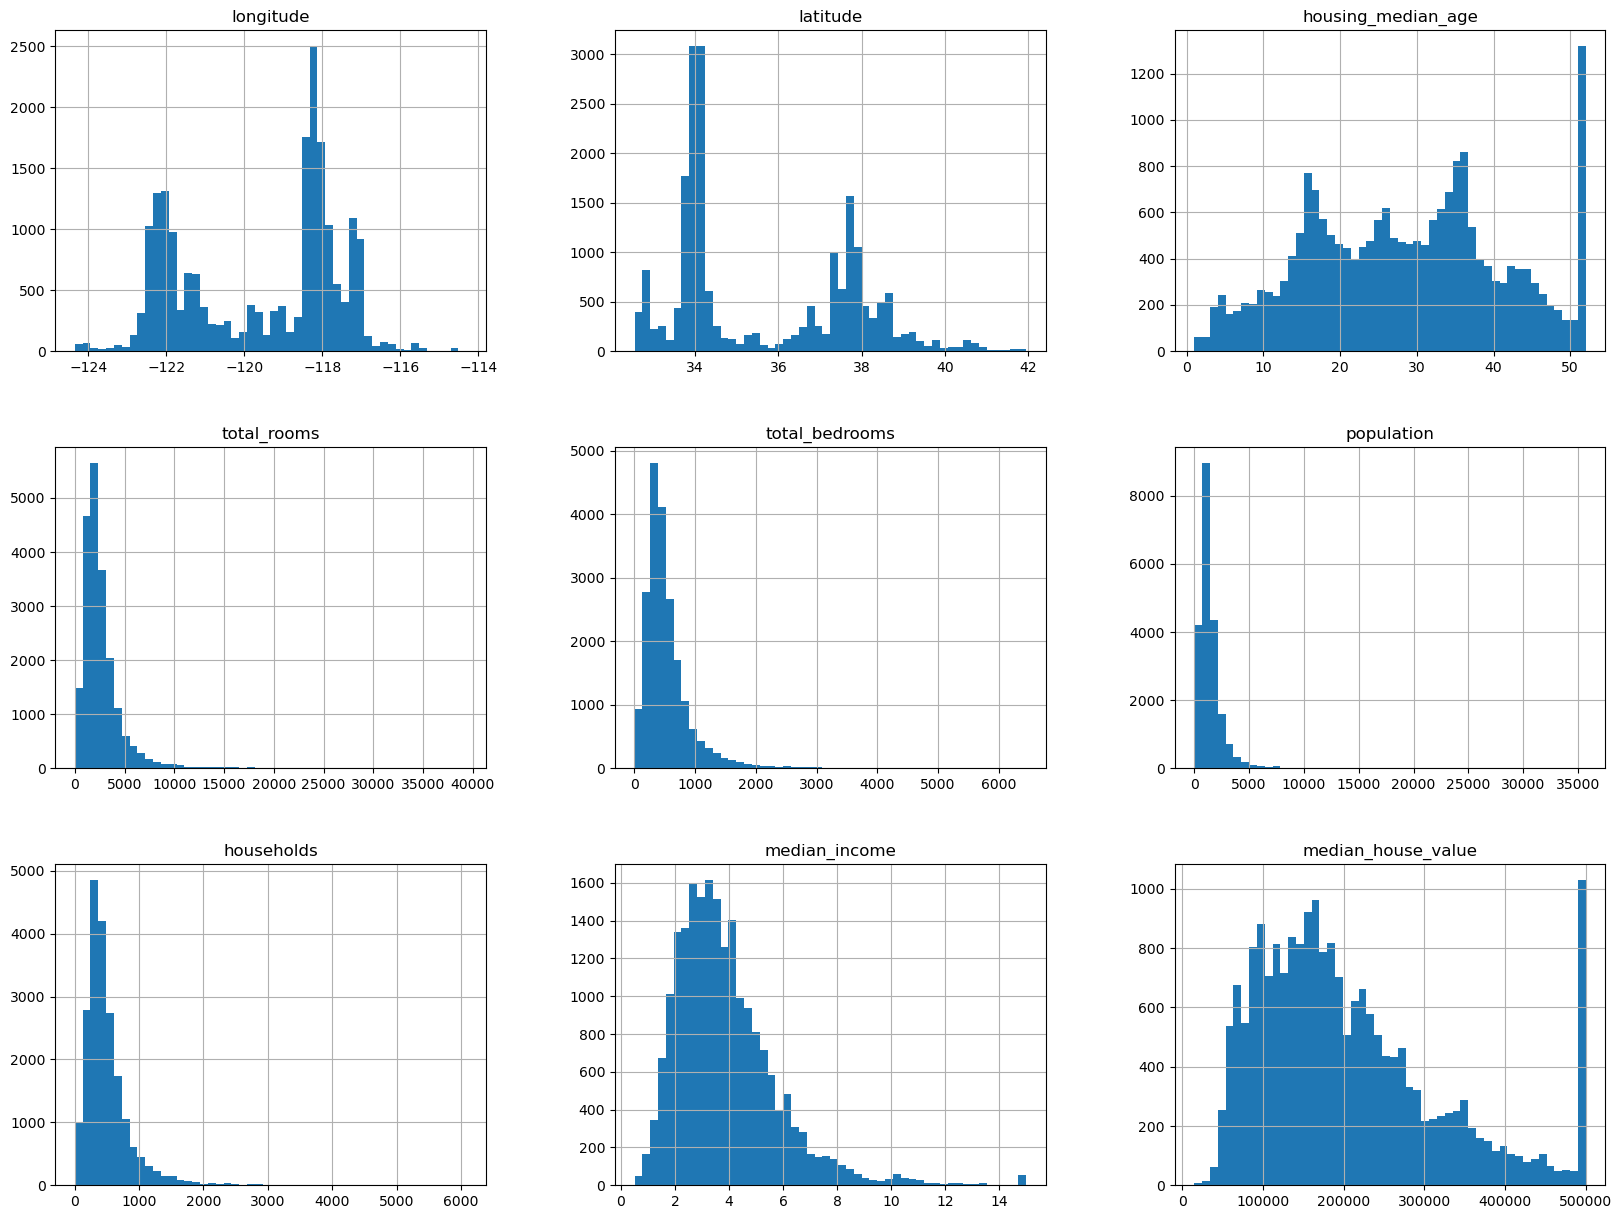

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [150]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [151]:
train_set,test_set=split_train_test(housing,0.2)
len(test_set),len(train_set)

(4128, 16512)

In [152]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff <test_ratio*2**32

In [153]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [154]:
housing_with_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"index")

In [155]:
len(test_set)

4128

In [156]:
housing_with_id["id"] = housing["longitude"] * 1000 +  housing["latitude"]
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"id")

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

In [ ]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude")

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [ ]:
housing.drop(['ocean_proximity'], axis=1,inplace=True)

In [ ]:
housing

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix
attributes= ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [ ]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:
corr_matrix=housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
median = housing["total_bedrooms"].median()
median

In [ ]:
housing["total_bedrooms"].fillna(median,inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
imputer.fit(housing_num)

In [ ]:
imputer.statistics_

In [ ]:
housing_num.median().values

In [ ]:
X=imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing

In [ ]:
housing_cat=housing[["ocean_proximity"]]

In [ ]:
housing_cat.head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
housing_cat_1hot.toarray()

In [ ]:
cat_encoder.categories_

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room  = X[:, bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)



In above example the transformer has one hyperparameter,add_bedrooms_per_room,set to True by default.This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not.More generally , you can add a hyperparameter to get any data preparation step that you are not 100% sure about.The more you automate these data preparation steps , the more combinations you can automatically try out ,making it much more likely that you will find a great combination(saving a lot of time)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scalar',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

In [ ]:
some_data = housing.iloc[:5]

In [ ]:
some_data

In [ ]:
some_labels = housing_labels.iloc[:5]

In [ ]:
some_labels

In [ ]:
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Predictions:",lin_reg.predict(some_data_prepared))

In [ ]:
print("Labels:",list(some_labels))


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg  = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)


In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:",scores)
    print("mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [ ]:
display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [ ]:
lin_rmse_scores =  np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg  = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
forest_score = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv = 10)
forest_rme_scores = np.sqrt(-forest_score)
display_scores(forest_rme_scores)

In [ ]:
# import joblib
# joblib.dump(my_model,"my_model.plk")

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test  = strat_test_set["median_house_value"].copy()


### Classfication chapter

In [157]:
from sklearn.datasets import fetch_openml
mnist =  fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [158]:
X , y =mnist["data"],mnist["target"]

In [159]:
X.shape

(70000, 784)

In [160]:
y.shape

(70000,)

In [161]:
X.iloc[:1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


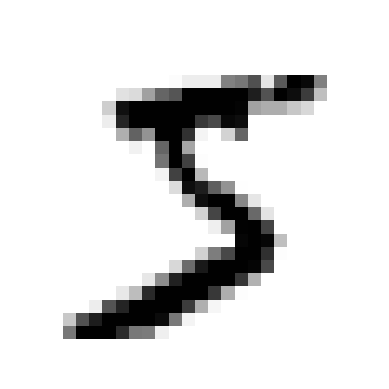

In [162]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

some_digit = X.iloc[:1]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [163]:
y[0]

'5'

In [164]:
import numpy as np
y = y.astype(np.uint8)

In [165]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [166]:
y_train_5 = ( y_train == 5)

In [167]:
y_test_5 = ( y_test == 5 )

In [168]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [169]:
some_digit

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
from sklearn.linear_model import SGDClassifier

X_train_ar=X_train.to_numpy()
some_digit=X_train_ar[0]
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train_ar,y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [171]:
sgd_clf

SGDClassifier(random_state=42)

In [172]:
X_train.keys()

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

Implementing Cross-Validation Occasionally you will need more control over the cross-validation process than what Scikit-Learn provides off the shelf. In these cases, you can implement cross-validation yourself. The following code does roughly the same thing as Scikit-Learn’s cross_val_score()  function, and it prints the same result:

In [173]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds  = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


Let’s use the cross_val_score()  function to evaluate our SGDClassifier  model, using K-fold cross-validation with three folds. Remember that K-fold cross-validation means splitting the training set into K folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds

In [174]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:

In [175]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
never_5_5clf = Never5Classifier()
cross_val_score(never_5_5clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not  a 5, you will be right about 90% of the time.

Confusion Matrix

To compute the confusion matrix ,you first need to have a set of predictions so that they can be compared to the actual targets.You could make predictions on the test set but let's keep it untouched for now .Instead we can use the cross_val_predict function

In [176]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [178]:
from  sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5,y_train_pred))
recall_score(y_train_5,y_train_pred)

0.8370879772350012


0.6511713705958311

In [179]:
y_scores = sgd_clf.decision_function([some_digit])

In [180]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [181]:
threshold = 0

In [182]:
y_some_digit_pred = (y_scores > threshold)

In [183]:
y_some_digit_pred

array([ True])

In [184]:
threshold = 8000
y_some_digit_pred  = (y_scores > threshold)
y_some_digit_pred

array([False])

To decide thresold, we can use cross_val_predict() function to get the scores of all the instances in the training set but thi time specify that you want to return decison scores instead of predictions

In [185]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

With these scores , use the precision_recall_curve() function to compute precision and recall for all possible thresholds

In [186]:
from sklearn.metrics import precision_recall_curve
precision,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

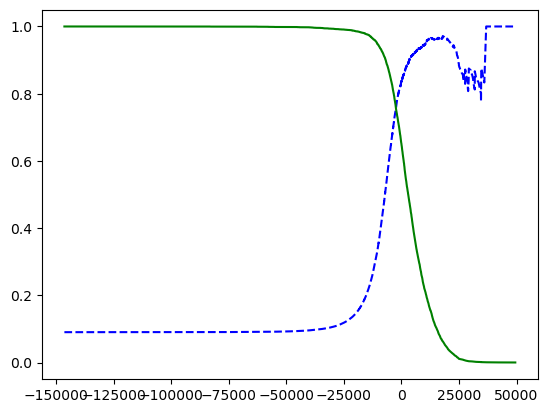

In [187]:
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(thresholds,precision[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")

plot_precision_recall_vs_threshold(precision,recalls,thresholds)
plt.show()

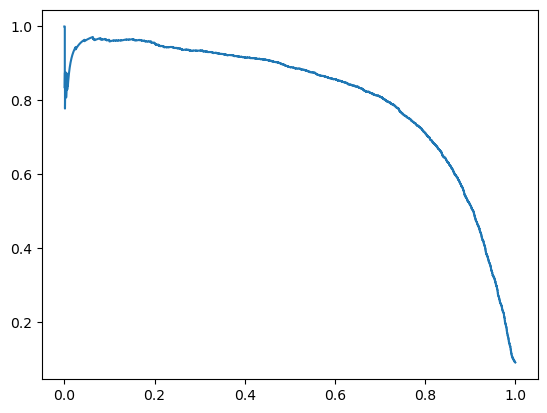

In [188]:
plt.plot(recalls,precision)

You can see that precision really starts to fall sharply around 80% recall.You will probably want to select a precision/recall trade-off just before that drop for example at around 60% recall.
Suppose you decide to aim for 90% precision.You look up the first plot and find that you need to use a threshold of about 8000.To be more precise you can search for the lowest threshold that gives you at least 90% precision(np.argmax() will give you the first index of the maximum value which in this case means the first True value):

In [189]:
threshold_90_precision=thresholds[np.argmax(precision>=0.90)]

In [190]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Lets check these predictions precision and recall

In [191]:
print(precision_score(y_train_5,y_train_pred_90))
recall_score(y_train_5,y_train_pred_90)

0.9000345901072293


0.4799852425751706

As you can see it is easy to create a classifier with virtually any precision you want :just set a high enough threshold and you are done.A high precision classifier is not that useful if its recall is too low

To plot the ROC curve , you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

In [193]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

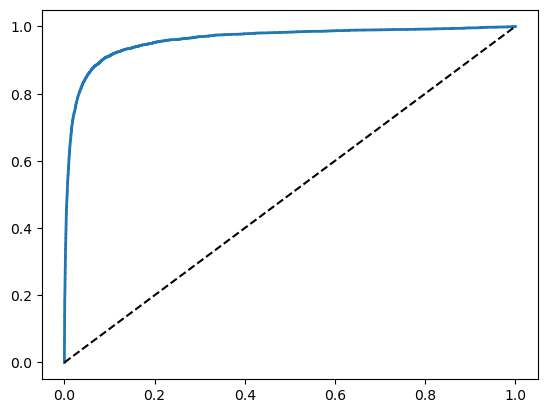

In [194]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr,tpr)
plt.show()

One wa y to compare classifiers is to measure area under the curve(AUC).A perfect classifier will have a ROC AUC equal to 1,wherease a purely random classifier will have a ROC AUC equal to 1 ,whereas a purely random classifier will have a ROC AUC equal to 0.5.Scikit-Learn provides a function to complete the ROC AUC

In [195]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

Let's now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier.First,you need to get scores for each instance in the trainig set.But due to the way it works , the RandomForestClassifer class does not have a decision_function() method.Instead it has a predict_proba() method.Scikit-Learn classifiers generally have one or the other , or both.The predict_proba() method returns an array containing a row per instance and a column per class,each containing the probability that the given instance belongs to the given class(eg. 70% chance that the image represnts a 5):


In [198]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

The roc_curve() function expects labels and scores , but instead of scores you can give ti class probabilities.Let's use the positive class's probability as the score:

In [199]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_scores_forest)

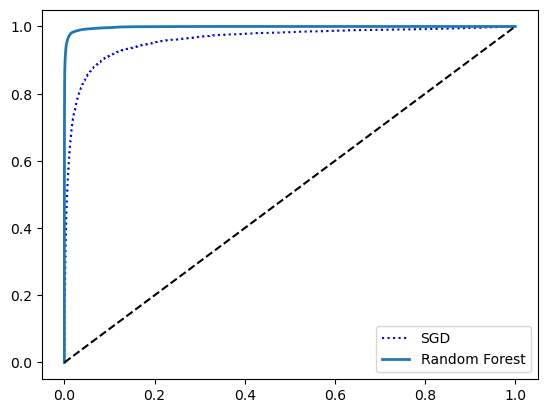

In [200]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

As you can see , the RandomForestClassifier ROC curve looks better than the SGDClassifier's:it comes much closer to the top left corner.As a result , it's ROC AUC score is also signifcantly better:

In [202]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [205]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)

SVC()

In [208]:
svm_clf.predict([some_digit])

C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

This code trains the SVC on the training set using the original target classes from 0 to 9 (y_train),instead of the 5-versus-the-rest target classes(y_train_5).Then it makes a prediction.Under the hood it used OvO strategy:it trained 45 binary classifiers,got their decision scores for the image and selected the class that won the most duels

if you call the decision_function() method , you will see that it returns 10 scores per instance(instead of just 1).That's one score per class

In [210]:
some_digit_scores = svm_clf.decision_function([some_digit])

C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [211]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [212]:
np.argmax(some_digit_scores)

5

In [214]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [215]:
svm_clf.classes_[5]

5

In [220]:
X_train,y_train

(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 59995       0       0       0       0       0       0       0       0       0   
 59996       0       0       0       0       0       0       0       0       0   
 59997       0       0       0       0       0       0       0       0       0   
 59998       0       0       0       0       0       0       0       0       0   
 59999       0       0       0       0       0       0       0       0       0   
 
        pixel1

In [221]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())


In [222]:
ovr_clf.fit(X_train,y_train)


OneVsRestClassifier(estimator=SVC())

In [223]:
ovr_clf.predict([some_digit])

C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does

array([5], dtype=uint8)

In [224]:
sgd_clf.decision_function([some_digit])

array([2164.22030239])

In [225]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis


In [229]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [230]:
conf_mx = confusion_matrix(y_train,y_train_pred)

In [231]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

It's often more convenient to look at an image representation of the confusion matrix, using Matplotlib's matshow() function

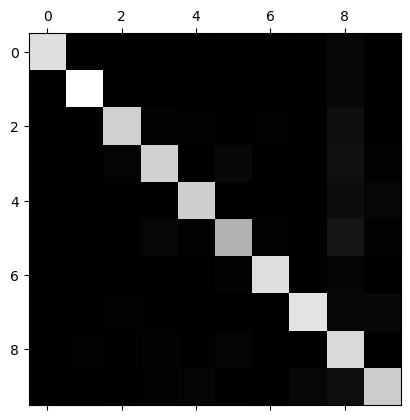

In [235]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks pretty good , since most images are on the main diagonal, which means that they were classified correctly.The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on the other digits.

In [237]:
row_sums =  conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

In [239]:
np.fill_diagonal(norm_conf_mx, 0)

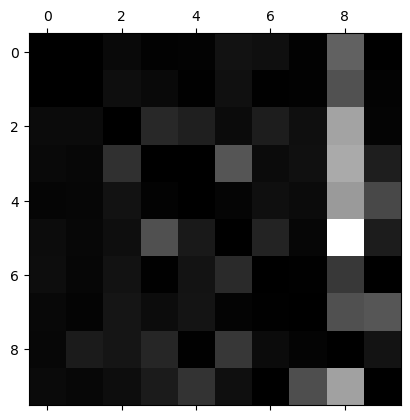

In [240]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

You can clearly see the kinds of errors the classifier makes. Remember that rows represent actual classes, while columns represent predicted classes. The column for class 8 is quite bright, which tells you that many images get misclassified as 8s. However, the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s. As you can see, the confusion matrix is not necessarily symmetrical. You can also see that 3s and 5s often get confused (in both directions). 

Analyzing the confusion matrix often gives you insights into ways to improve your classifier. Looking at this plot, it seems that your efforts should be spent on reducing the false 8s. For example, you could try to gather more training data for digits that look like 8s (but are not) so that the classifier can learn to distinguish them from real 8s. Or you could engineer new features that would help the classifier— for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns, such as closed loops, stand out more. Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time-consuming

# Mutilabel Classification

In [244]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = ( y_train >=7 )
y_train_odd = ( y_train % 2 ==1 )
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier()

This code creates a y_multilabel array containing two target labels for each digit image: the first indicates whether or not the digit is large (7, 8, or 9), and the second indicates whether or not it is odd. The next lines create a KNeighborsClassifier instance (which supports multilabel classification, though not all classifiers do), and we train it using the multiple targets array. Now you can make a prediction, and notice that it outputs two labels:

In [245]:
knn_clf.predict([some_digit])

C:\Users\Abhishek Srivastav\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

It gets it right!The digit 5 is indeed not large ( False) and odd(True)

Below code computes the average F1 score across all labels:

In [248]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [252]:
from sklearn.metrics import f1_score
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

This assumes that all labels are equally important, however, which may not be the case. In particular, if you have many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s score on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the number of instances with the target label).To do this, simply set average="weighted" in the preceding line.

# Multioutput Classification

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

In [255]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod  = X_test

# Training Linear Regression model

In [2]:
import numpy as np

In [6]:
X=2*np.random.rand(100, 1)

In [7]:
y=4+3*X + np.random.randn(100, 1)

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

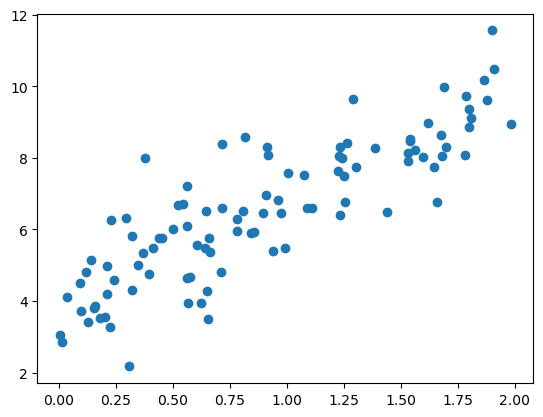

In [11]:
plt.scatter(X,y)
plt.show()

Now lets compute 0^ using the Normal Equation.We will use the inv() function from NumPy's linear algebra module(np.linalg) to compute the inverse of a matrix and dot() method for matrix multiplication:


In [16]:
X_b,y

(array([[1.        , 0.39580964],
        [1.        , 0.41436931],
        [1.        , 1.2243874 ],
        [1.        , 0.32181457],
        [1.        , 0.36997861],
        [1.        , 1.54234913],
        [1.        , 1.91126449],
        [1.        , 1.23319617],
        [1.        , 1.53361965],
        [1.        , 1.68763866],
        [1.        , 0.65811639],
        [1.        , 0.52284929],
        [1.        , 1.64479466],
        [1.        , 1.30387387],
        [1.        , 0.50074024],
        [1.        , 0.56234297],
        [1.        , 1.98337596],
        [1.        , 0.80789953],
        [1.        , 1.80772491],
        [1.        , 0.11641979],
        [1.        , 0.21211333],
        [1.        , 0.09668196],
        [1.        , 1.54168582],
        [1.        , 0.78275009],
        [1.        , 1.78307349],
        [1.        , 1.10961414],
        [1.        , 1.56262784],
        [1.        , 0.71729588],
        [1.        , 0.71317172],
        [1.   

In [12]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is y = 4+3X1+Gaussian noise.Let's see what the equation found


In [13]:
theta_best

array([[3.87574789],
       [2.96063657]])

We would have hoped for theta0 = 4 and theta1 = 3 instead of theta0 = 4.215 and theta1 = 2.770.Close but noise made it impossible to recover the exact parameters of the original function

In [19]:
X_new = np.array([[0],[2]])

In [21]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.87574789],
       [9.79702102]])

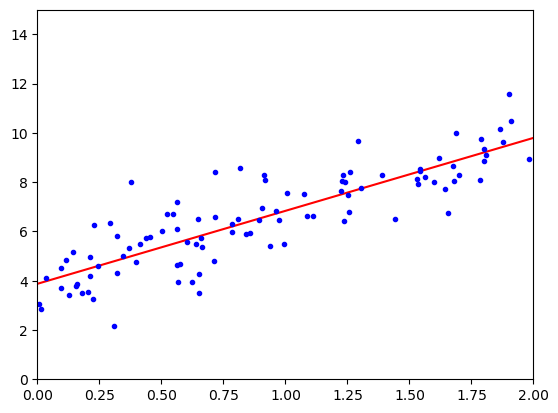

In [28]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()